# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [70]:
# Checking the number of mice.
num_unique_mice = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice: {num_unique_mice}")

Number of unique mice: 249


In [71]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_result = duplicate_mice['Mouse ID'].unique()
print(duplicate_mice_result)

['g989']


In [72]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == 'g989']

print("Data for mouse ID 'g989':")
print(duplicate_mouse_data)

Data for mouse ID 'g989':
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female     

In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop(merged_data[merged_data['Mouse ID'] == 'g989'].index)
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [74]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice in the cleaned DataFrame: {num_unique_mice_cleaned}")

Number of unique mice in the cleaned DataFrame: 248


## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
}, inplace=True)
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume   Variance  \
Drug Regimen                                                      
Capomulin             40.675741            41.557809  24.947764   
Ceftamin              52.591172            51.776157  39.290177   
Infubinol             52.884795            51.820584  43.128684   
Ketapril              55.235638            53.698743  68.553577   
Naftisol              54.331565            52.509285  66.173479   
Placebo               54.033581            52.288934  61.168083   
Propriva              52.320930            50.446266  43.852013   
Ramicane              40.216745            40.673236  23.486704   
Stelasyn              54.233149            52.431737  59.450562   
Zoniferol             53.236507            51.818479  48.533355   

              Standard Deviation       SEM  
Drug Regimen                                
Capomulin               4.994774  0.329346  
Ceftamin                6.268188  0.469821  
Infubinol      

In [76]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

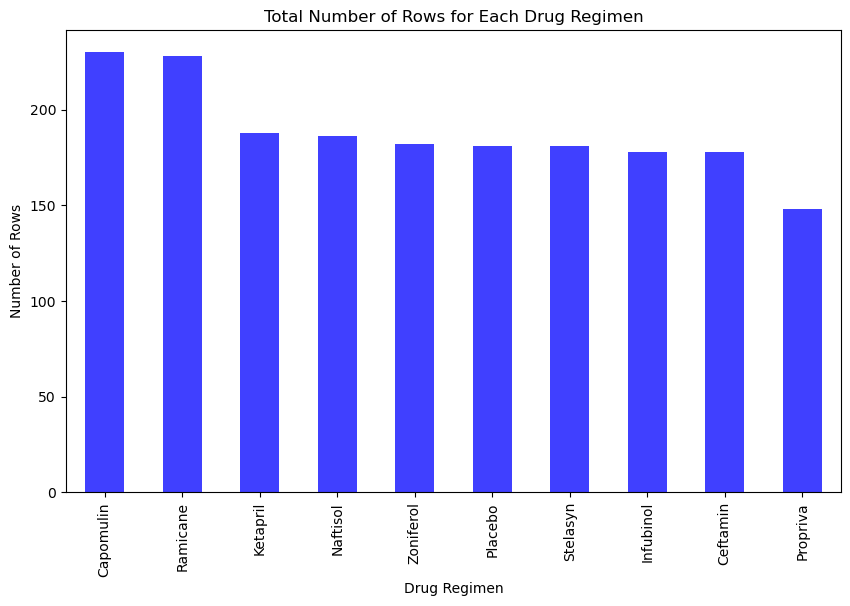

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='blue', alpha=0.75, figsize=(10, 6))
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.show()

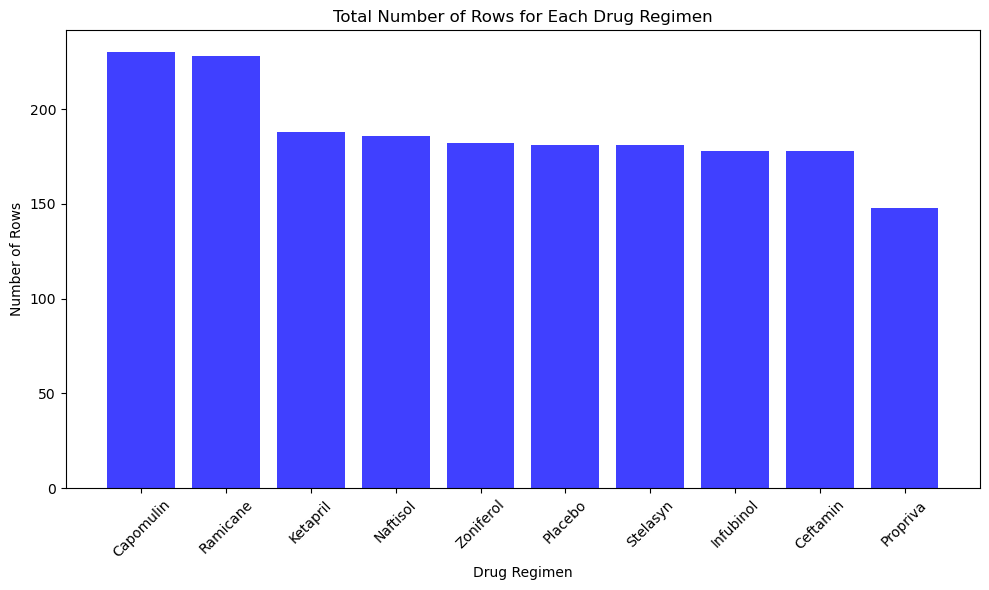

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
drug_regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values
plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, counts, color='blue', alpha=0.75)
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

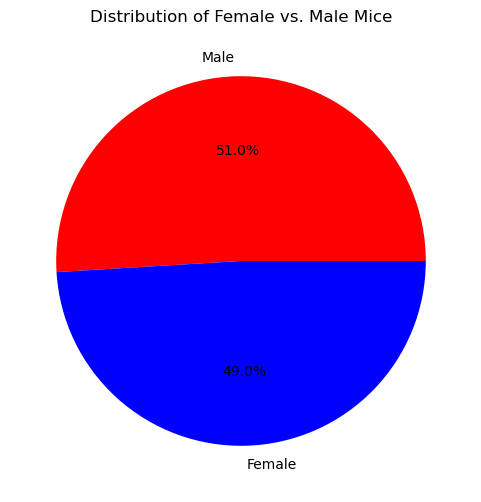

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_versus_male = cleaned_data['Sex'].value_counts()
female_versus_male.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue'], figsize=(6, 6))
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel('')
plt.show()

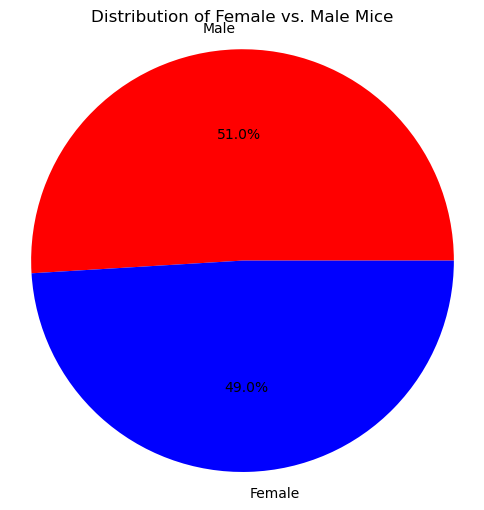

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_versus_female = cleaned_data['Sex'].value_counts()
labels = male_versus_female.index
counts = male_versus_female.values
colors = ['red', 'blue']
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Female vs. Male Mice")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_per_mouse = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume = pd.merge(cleaned_data, last_timepoint_per_mouse, on=['Mouse ID', 'Timepoint'])
print(final_tumor_volume)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
243     z314     Stelasyn  Female          21          28          5   
244     z435     Propriva  Female          12          26         10   
245     z581    Infubinol  Female          24          25         45   
246     z795     Naftisol  Female          13          29         45   
247     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2  

In [82]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []
for treatment in treatments_list:
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(treatment_data)
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"----- {treatment} -----")
    print(f"Lower Quartile: {lower_q}")
    print(f"Upper Quartile: {upper_q}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {outliers}")


----- Capomulin -----
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----- Ramicane -----
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----- Infubinol -----
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Potential Outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
----- Ceftamin -----
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


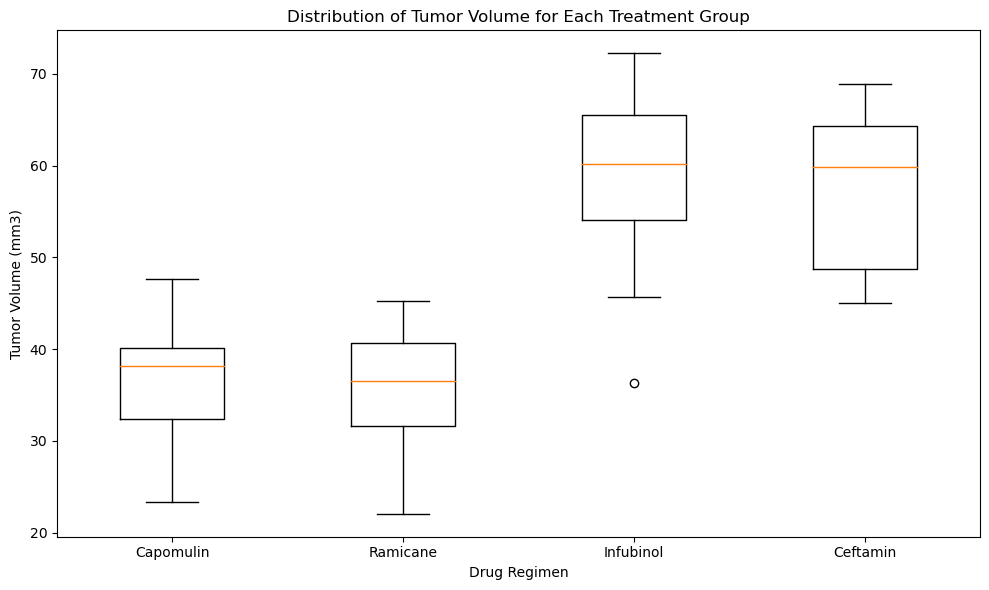

In [83]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments_list)
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()








## Line and Scatter Plots

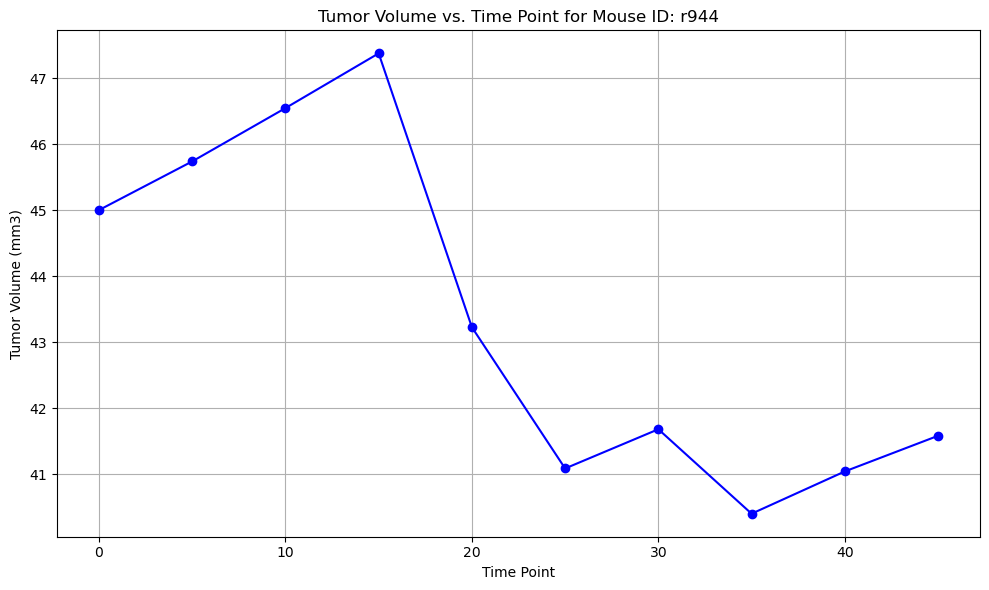

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'r944'
capomulin_mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == mouse_id)]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title(f"Tumor Volume vs. Time Point for Mouse ID: {mouse_id}")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.grid()
plt.show()

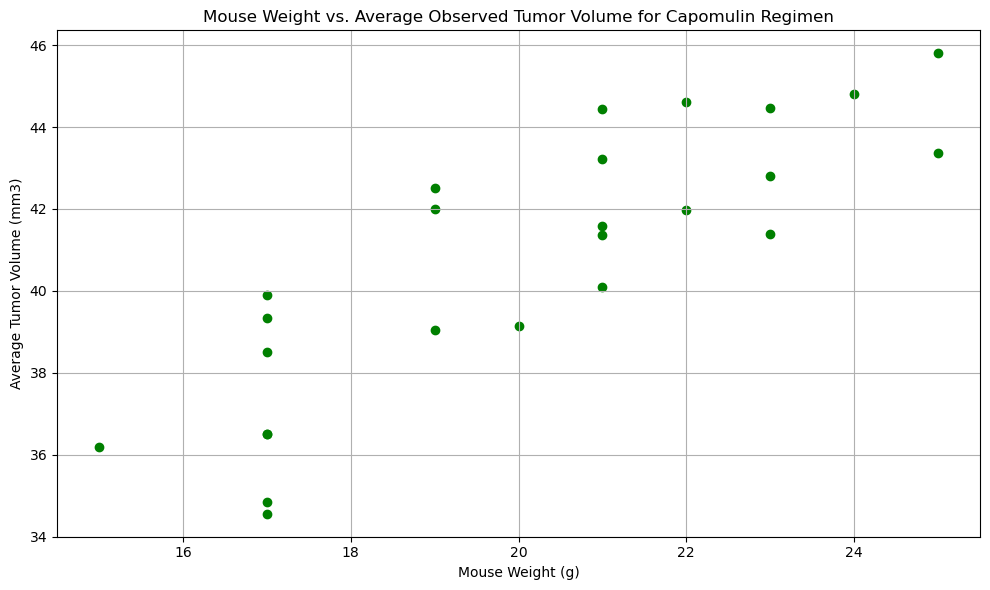

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='green')
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.grid()
plt.show()







## Correlation and Regression

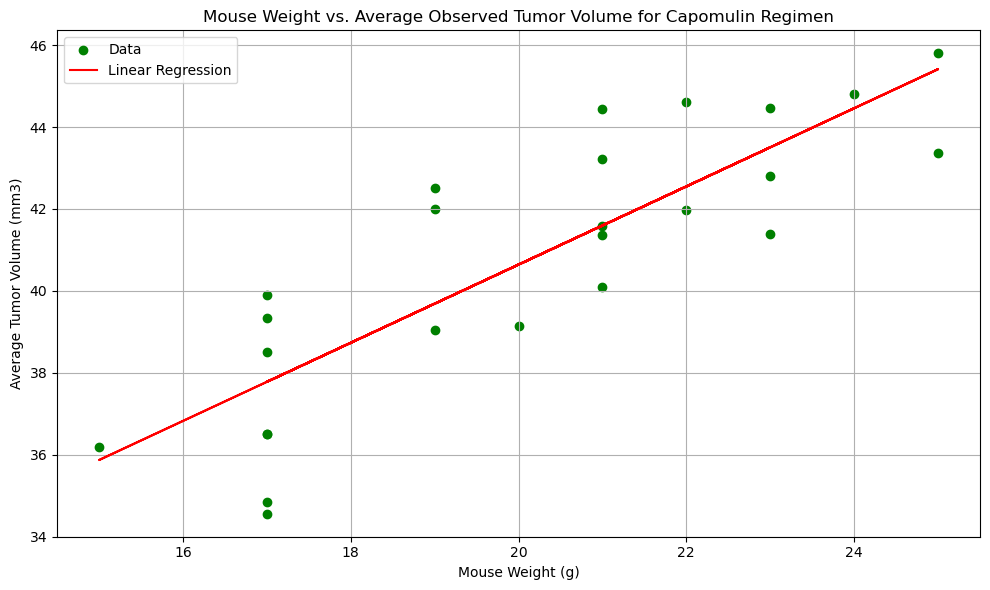

Correlation Coefficient: 0.841936342469472


In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
correlation_coefficient = st.pearsonr(mouse_weights, average_tumor_volume)[0]
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)
regression_line = slope * mouse_weights + intercept
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='green', label='Data')
plt.plot(mouse_weights, regression_line, color='red', label='Linear Regression')
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()
print(f"Correlation Coefficient: {correlation_coefficient}")